In [1]:
using StateSpaceDynamics, Plots

In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.95 0.05; 0.05 0.95], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.1 0.0; 0.0 0.1], [0.0, 0.0], [0.1 0.0; 0.0 0.1]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.5 0.0 … 0.0 0.0; 0.0 0.5 … 0.0 0.0; … ; 0.0 0.0 … 0.5 0.0; 0.0 0.0 … 0.0 0.5]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.8638325554843976; 0.8638325

In [3]:
T = 200
# Generate synthetic data
x, y, z = sample(model, T)


([0.12781148406102946 -0.43551433682513074 … 0.9094042031590193 0.33436564157211934; 0.3788281101630884 -0.21698572664429977 … -1.0322249266471213 1.0029556134436872], [-0.23695130919359814 0.19690226661132146 … -1.3364697080661003 1.264127486591625; 0.6768781267756329 0.4110721680226443 … -1.0141890274016716 0.4364950480096105; … ; -0.7985358658347501 1.2320332201982314 … 0.9064441017981264 -2.1775597797660042; 0.35633628786769284 -1.54937097407612 … 0.30360016939733314 -0.8540978332134574], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

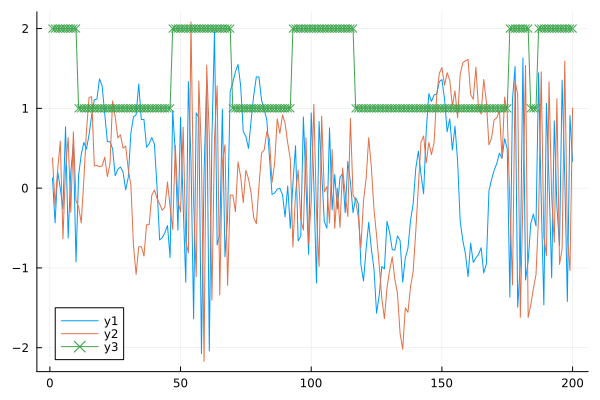

In [4]:
plot(x')
plot!(z, marker=:x)

Fit and get back posteriors

In [49]:
mls, param_diff, FB, FS = fit!(model, y; max_iter=3)

CompositeException: TaskFailedException

    nested task error: LinearAlgebra.SingularException(0)
    Stacktrace:
      [1] #lu#7
        @ ~/.julia/juliaup/julia-1.10.4+0.x64.apple.darwin14/share/julia/stdlib/v1.10/SparseArrays/src/solvers/umfpack.jl:380 [inlined]
      [2] lu(S::SparseArrays.SparseMatrixCSC{Float64, Int64})
        @ SparseArrays.UMFPACK ~/.julia/juliaup/julia-1.10.4+0.x64.apple.darwin14/share/julia/stdlib/v1.10/SparseArrays/src/solvers/umfpack.jl:375
      [3] \(A::LinearAlgebra.Hermitian{Float64, SparseArrays.SparseMatrixCSC{Float64, Int64}}, B::Vector{Float64})
        @ SparseArrays.CHOLMOD ~/.julia/juliaup/julia-1.10.4+0.x64.apple.darwin14/share/julia/stdlib/v1.10/SparseArrays/src/solvers/cholmod.jl:1723
      [4] \(A::SparseArrays.SparseMatrixCSC{Float64, Int64}, B::Vector{Float64})
        @ SparseArrays ~/.julia/juliaup/julia-1.10.4+0.x64.apple.darwin14/share/julia/stdlib/v1.10/SparseArrays/src/linalg.jl:1712
      [5] update_state!(d::NLSolversBase.TwiceDifferentiable{Float64, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, state::Optim.NewtonState{Vector{Float64}, Float64, LinearAlgebra.Cholesky{Float64, SparseArrays.SparseMatrixCSC{Float64, Int64}}}, method::Optim.Newton{LineSearches.InitialStatic{Float64}, LineSearches.BackTracking{Float64, Int64}})
        @ Optim ~/.julia/packages/Optim/fBdaz/src/multivariate/solvers/second_order/newton.jl:65
      [6] optimize(d::NLSolversBase.TwiceDifferentiable{Float64, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, initial_x::Vector{Float64}, method::Optim.Newton{LineSearches.InitialStatic{Float64}, LineSearches.BackTracking{Float64, Int64}}, options::Optim.Options{Float64, Nothing}, state::Optim.NewtonState{Vector{Float64}, Float64, LinearAlgebra.Cholesky{Float64, SparseArrays.SparseMatrixCSC{Float64, Int64}}})
        @ Optim ~/.julia/packages/Optim/fBdaz/src/multivariate/optimize/optimize.jl:54
      [7] optimize(d::NLSolversBase.TwiceDifferentiable{Float64, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, initial_x::Vector{Float64}, method::Optim.Newton{LineSearches.InitialStatic{Float64}, LineSearches.BackTracking{Float64, Int64}}, options::Optim.Options{Float64, Nothing})
        @ Optim ~/.julia/packages/Optim/fBdaz/src/multivariate/optimize/optimize.jl:36
      [8] smooth(lds::StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}, y::Matrix{Float64}, w::Vector{Float64})
        @ StateSpaceDynamics ~/Documents/GitHub/StateSpaceDynamics.jl/src/LinearDynamicalSystems.jl:547
      [9] macro expansion
        @ ~/Documents/GitHub/StateSpaceDynamics.jl/src/SLDS.jl:297 [inlined]
     [10] (::StateSpaceDynamics.var"#221#threadsfor_fun#56"{StateSpaceDynamics.var"#221#threadsfor_fun#54#57"{SwitchingLinearDynamicalSystem, Matrix{Float64}, Vector{StateSpaceDynamics.FilterSmooth{Float64}}, Matrix{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ StateSpaceDynamics ./threadingconstructs.jl:215
     [11] #221#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [12] (::Base.Threads.var"#1#2"{StateSpaceDynamics.var"#221#threadsfor_fun#56"{StateSpaceDynamics.var"#221#threadsfor_fun#54#57"{SwitchingLinearDynamicalSystem, Matrix{Float64}, Vector{StateSpaceDynamics.FilterSmooth{Float64}}, Matrix{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

In [30]:
mls

2-element Vector{Float64}:
 -7216.593470291374
    -1.3313635640941085e6

In [ ]:
model.B[k], y, vec(hs[k,:])

In [ ]:
-loglikelihood(x, lds, y, w)

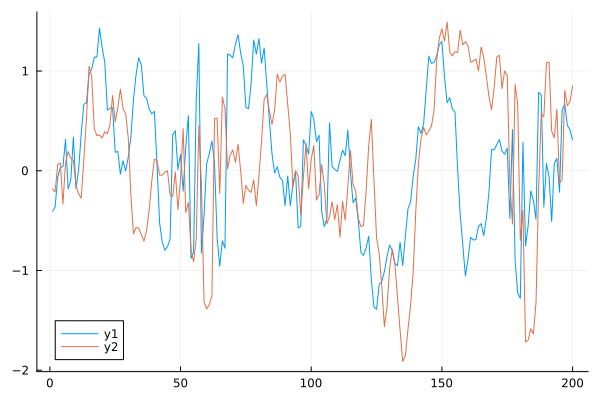

In [31]:
plot(FS[1].x_smooth')

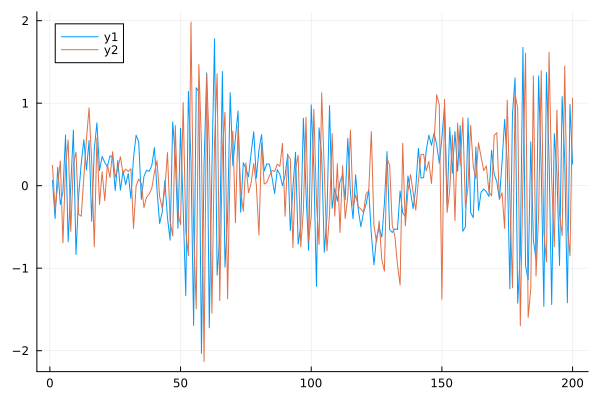

In [32]:
plot(FS[2].x_smooth')

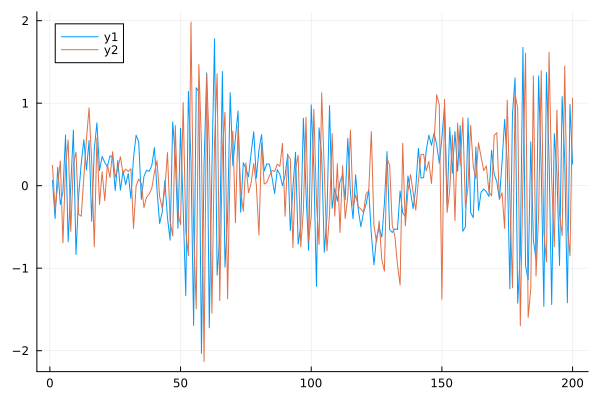

In [33]:
plot(FS[2].E_z[:,:,1]')

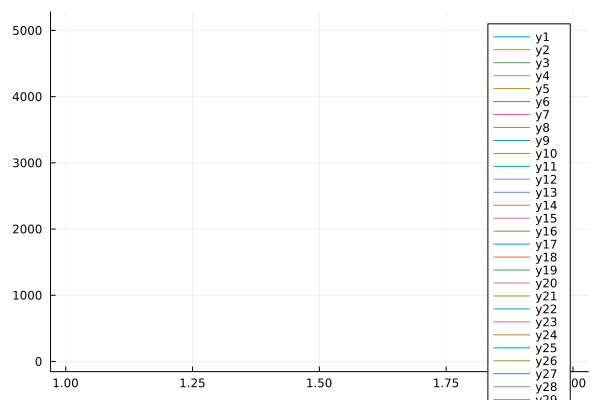

In [34]:
plot(FS[2].E_zz[1,1,:,1]')

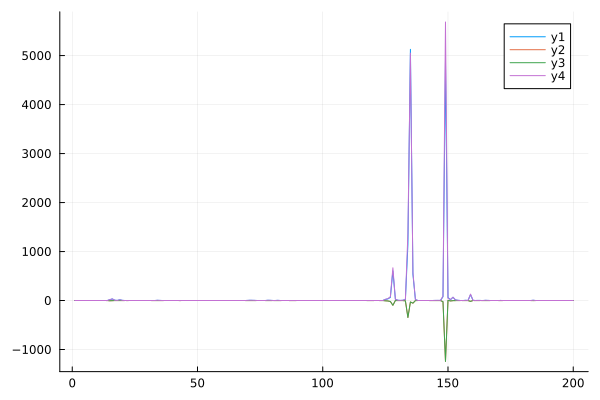

In [35]:
plot(vec(FS[2].p_smooth[1,1,:]))
plot!(vec(FS[2].p_smooth[1,2,:]))
plot!(vec(FS[2].p_smooth[2,1,:]))
plot!(vec(FS[2].p_smooth[2,2,:]))

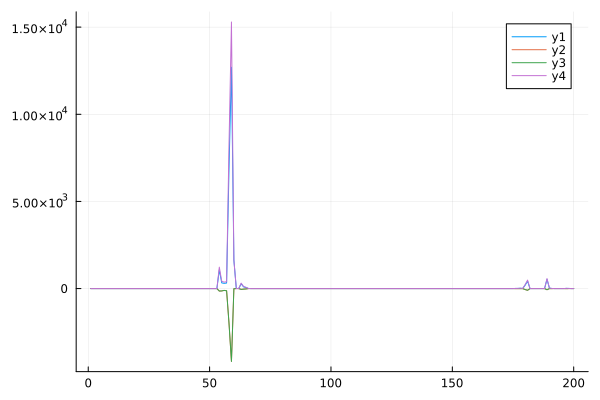

In [36]:
plot(vec(FS[1].p_smooth[1,1,:]))
plot!(vec(FS[1].p_smooth[1,2,:]))
plot!(vec(FS[1].p_smooth[2,1,:]))
plot!(vec(FS[1].p_smooth[2,2,:]))

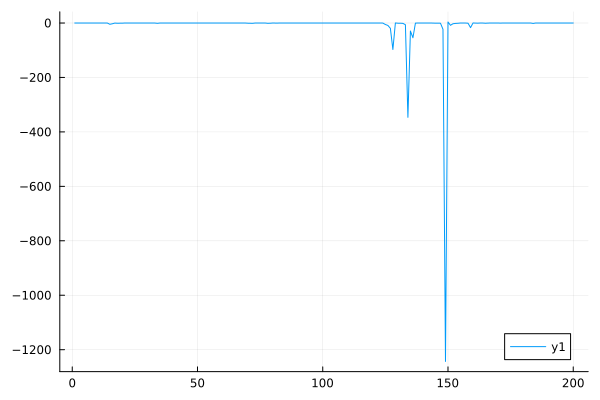

In [37]:
plot(vec(FS[2].p_smooth[2,1,:]))

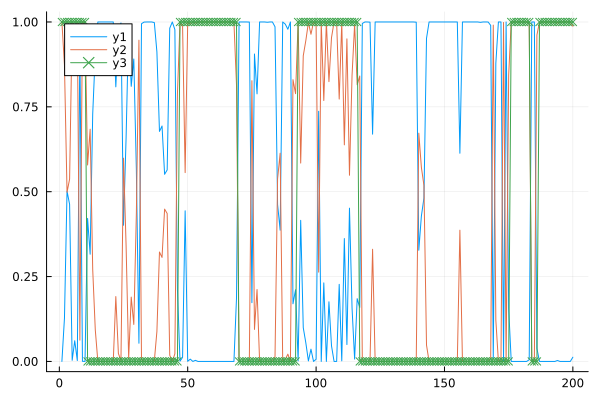

In [45]:
plot(exp.(FB.γ)')
plot!(z .- 1, marker=:x)

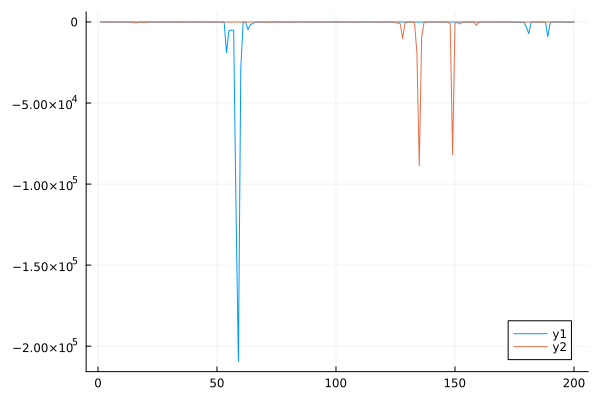

In [42]:
#plot(FB.loglikelihoods[1,:])
plot(FB.loglikelihoods')

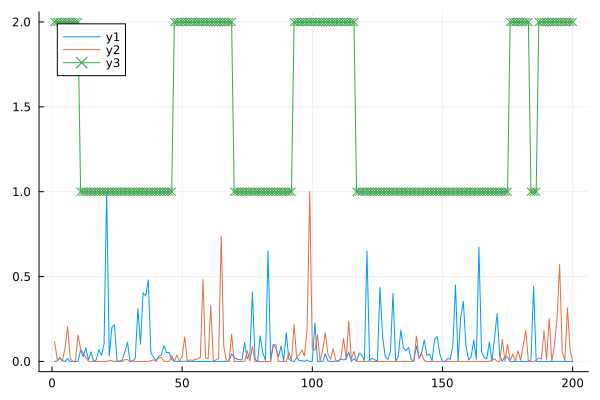

In [43]:
plot(exp.(FB.loglikelihoods'))
plot!(z, marker=:x)

In [17]:
maximum(FB.loglikelihoods[1,:])

0.0

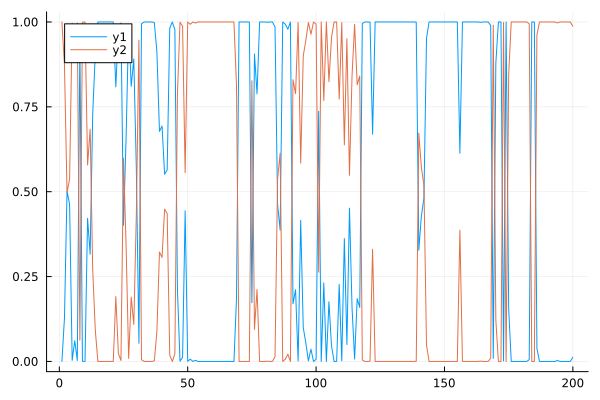

In [46]:
plot(exp.(FB.γ)')


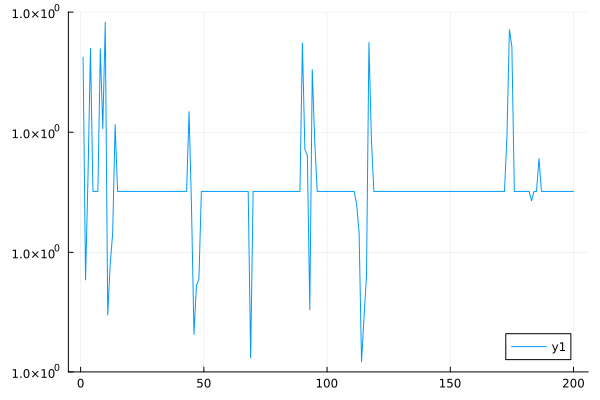

GKS: Possible loss of precision in routine SET_WINDOW


In [19]:
plot(sum(exp.(FB.γ), dims=1)')

In [20]:
blah = sum(exp.(FB.γ), dims=1);

In [21]:
blah[blah .> 1]

19-element Vector{Float64}:
 1.0000000000000449
 1.0000000000000053
 1.0000000000000477
 1.0000000000000475
 1.0000000000000209
 1.0000000000000564
 1.0000000000000222
 1.0000000000000266
 1.0000000000000495
 1.000000000000014
 1.0000000000000122
 1.0000000000000406
 1.0000000000000167
 1.0000000000000497
 1.0000000000000173
 1.0000000000000184
 1.000000000000054
 1.0000000000000482
 1.0000000000000109

In [22]:
any(sum(clamp.(exp.(FB.γ), 0.0, 1.0), dims=1) .> 1.)

true

In [23]:
exp.(zeros(size(FB.γ)...))

2×200 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [24]:
hs = exp.(1e-10 * ones(size(FB.γ)...))


2×200 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [25]:
exp(-10.)

4.5399929762484854e-5

In [26]:
log_likelihoods = [-10.0 -15.0; -12.0 -10.0; -9.0 -13.0; -15.0 -11.0]


4×2 Matrix{Float64}:
 -10.0  -15.0
 -12.0  -10.0
  -9.0  -13.0
 -15.0  -11.0

In [44]:
exp.(FB.γ)'

200×2 adjoint(::Matrix{Float64}) with eltype Float64:
 5.261e-17    1.0
 0.12757      0.87243
 0.501775     0.498225
 0.46272      0.53728
 0.0033853    0.996615
 0.0609399    0.93906
 0.00260196   0.997398
 0.937316     0.0626845
 0.000403206  0.999597
 1.84788e-5   0.999982
 ⋮            
 1.06605e-18  1.0
 2.93646e-6   0.999997
 0.00270993   0.99729
 3.20058e-14  1.0
 4.07692e-10  1.0
 6.5422e-82   1.0
 8.38555e-91  1.0
 3.24078e-12  1.0
 0.0123534    0.987647